# Best Neighborhood in Pittsburgh

## Team: Group 11
#### Tom Greene
#### Josavee Sok-Coyle
#### Troy ReinhardtTo figure out the best neighborhood in Pittsburgh, we combined together three different metrics to create one overall metric.

## Part 1: Art - Tom

One of the coolest things about coming from the suburbs into the city is the "different style". Cities tend to have a lot more character than normal towns and because of that have more charm. This is due to a number of things such as the people, stores/ restaurants, architecture, food, etc. Of these reasons, a very underrated one that can turn a neighborhood from good to great is art. While many believe public art doesn't matter when it comes to defining a neighborhood, in actuality it is extremely important. Public art is what causes many people to visit neighborhoods they wouldn't otherwise visit, which is why, as a city rich of art, I chose to rank the neighborhoods of Pittsburgh based on the amount of art they have.

In [1]:
##### load pandas (always do this first)
import pandas as pd
import numpy as np
# If you don't do this what are you doing with your life.
data = pd.read_csv("https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151")
# Grouping the data by Neighborhood
neighborhood = data.neighborhood
# Below gathers all of the instances a neighborhood appears on this list
neighborhood.value_counts()


Central Business District    27
Squirrel Hill South          22
Allegheny Center             18
South Side Flats             10
Highland Park                10
Beechview                     8
North Shore                   7
Shadyside                     6
Brighton Heights              5
Lower Lawrenceville           5
Central Oakland               5
Hazelwood                     4
Spring Hill-City View         4
Duquesne Heights              3
South Side Slopes             3
Greenfield                    3
Carrick                       3
Point Breeze                  3
Beltzhoover                   3
Perry North                   2
Lincoln-Lemington-Belmar      2
Regent Square                 2
Squirrel Hill North           2
Upper Hill                    2
Spring Garden                 2
Garfield                      2
Brookline                     2
East Allegheny                2
Elliott                       2
Allentown                     2
Central Lawrenceville         2
Mount Wa

Text(0, 0.5, 'Number of Art Pieces')

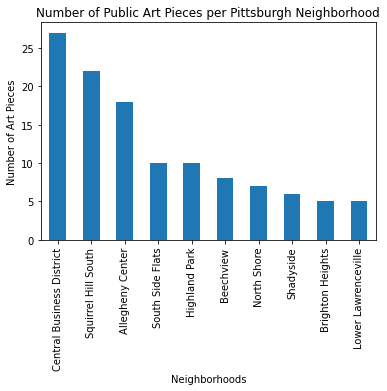

In [2]:
# Imports plotting devices
from matplotlib import pyplot as plt

# Creates bar graph
neighborhood.value_counts().head(10).plot(kind='bar')

plt.title('Number of Public Art Pieces per Pittsburgh Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Art Pieces')


##### Best Neighborhood???
The winner is the Central Business District with Squirrel Hill South in second and Allegheny Center in third.

##### Conclusion
Personally, my I was not surprised to find out that the central business district won due to the fact that it is the downtown "Touristy" area of Pittsburgh. I would also say it is my favorite part of Pittsburgh (other than Oakland of course!). I was mostly surprsed to find that Oakland did not even make the top ten because it seems like there is a ton of art in Oakland.

## Part 2: Capital Projects - Josavee

In my part of the project, I chose capital projects as my metric. I am analyzing which neighborhood brings in the most government money to spend on projects that better their neighborhood.

In [3]:
capital_data = pd.read_csv("https://data.wprdc.org/datastore/dump/2fb96406-813e-4031-acfe-1a82e78dc33c")
capital_data


,id,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1850147310,BRIDGE REPAIRS,Columbus Avenue Bridge Handicapped Ramp and In...,Engineering and Construction,100000.0,Planned,Columbus Avenue Bridge,Bridge,2017,2017-02-08,...,Manchester,6.0,21.0,4.200321e+10,1.0,21.0,1.0,1-8,40.458485,-80.024439
1,578777540,CARNAHAN ROAD WENZELL AVENUE (TIP),Construction,Engineering and Construction,560000.0,Planned,Carnahan Road Bridge,Bridge,2017,2017-02-08,...,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,40.407141,-80.034342
2,579358971,CARNAHAN ROAD WENZELL AVENUE (TIP),Construction,Engineering and Construction,2240000.0,Planned,Carnahan Road Bridge,Bridge,2017,2017-02-08,...,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,40.407141,-80.034342
3,726259916,CHARLES ANDERSON BRIDGE (TIP),Preliminary Engineering Phase,Engineering and Construction,35450.0,Planned,Charles Anderson Bridge,Bridge,2017,2017-02-08,...,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-8,40.434414,-79.950131
4,2027345037,CHARLES ANDERSON BRIDGE (TIP),Preliminary Engineering Phase,Engineering and Construction,673550.0,Planned,Charles Anderson Bridge,Bridge,2017,2017-02-08,...,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-8,40.434414,-79.950131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1430635470,FACILITY IMPROVEMENTS - CITY FACILITIES,62nd STREET WAREHOUSE EXPANSION,Facility Improvement,1600000.0,Planned,Public Works Construction Division Building,Facility,2020,2020-09-30,...,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.489873,-79.935900
997,1920802278,COMPLETE STREETS,TRAFFIC CALMING - CENTRE AVENUE CORRIDOR,Engineering and Construction,200000.0,Planned,NaN,Non-Asset,2020,2020-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,1216752652,COMPLETE STREETS,PEDESTRIAN SIGNAL UPGRADES - FIFTH & HIGHLAND,Engineering and Construction,210000.0,Planned,NaN,Non-Asset,2020,2020-09-30,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-17,40.451940,-79.923930
999,1807693253,COMPLETE STREETS,PEDESTRIAN SIGNAL UPGRADES - FIFTH & WILKINS,Engineering and Construction,75000.0,Planned,NaN,Non-Asset,2020,2020-09-30,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.447793,-79.937078


Checking which neighborhood has the most and least projects

In [4]:
print(capital_data['neighborhood'].value_counts())

South Side Flats        28
South Side Slopes       20
Elliott                 19
Brookline               17
Bloomfield              16
                        ..
Spring Garden            1
California-Kirkbride     1
Glen Hazel               1
Fairywood                1
Arlington                1
Name: neighborhood, Length: 73, dtype: int64


In [5]:
#editing the data into just the budgeted amount and neighborhood
data = capital_data.loc[:, ['budgeted_amount', 'neighborhood']]
data
t= data.groupby('neighborhood')['budgeted_amount'].sum()
t = pd.DataFrame(t)
t

,budgeted_amount
neighborhood,
Allegheny Center,1962770.50
Allegheny West,6813068.20
Allentown,640500.00
Arlington,250000.00
Banksville,2973000.00
...,...
Upper Hill,1430968.75
Upper Lawrenceville,8500.00
West End,555057.58


#### Which neighborhood receives the most money for capital projects?

Text(0.5, 0, 'Total Captial Project Money')

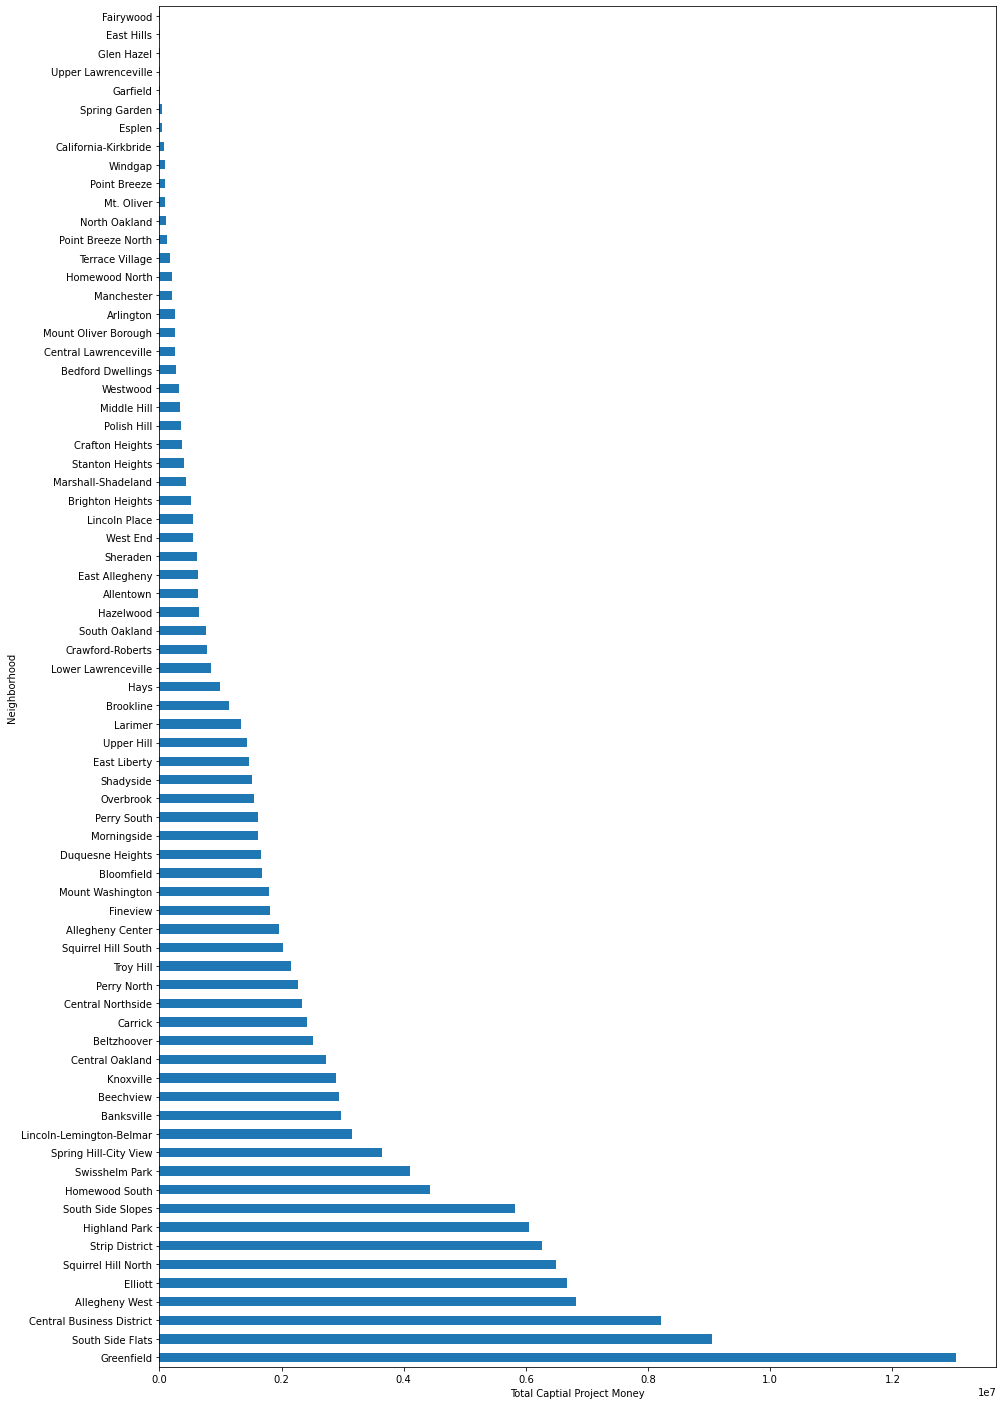

In [6]:
t = t.sort_values(by=['budgeted_amount'], ascending=False)
graph = t.plot.barh(figsize=(15,data.shape[0] * 0.025), legend=None)
graph.set_ylabel('Neighborhood')
graph.set_xlabel('Total Captial Project Money')

neighborhood
Allegheny Center       14.729302
Allegheny West         51.127596
Allentown               4.806531
Arlington               1.876086
Banksville             22.310410
                         ...    
Upper Hill             10.738479
Upper Lawrenceville     0.063787
West End                4.165342
Westwood                2.438911
Windgap                 0.637869
Name: budgeted_amount, Length: 73, dtype: float64


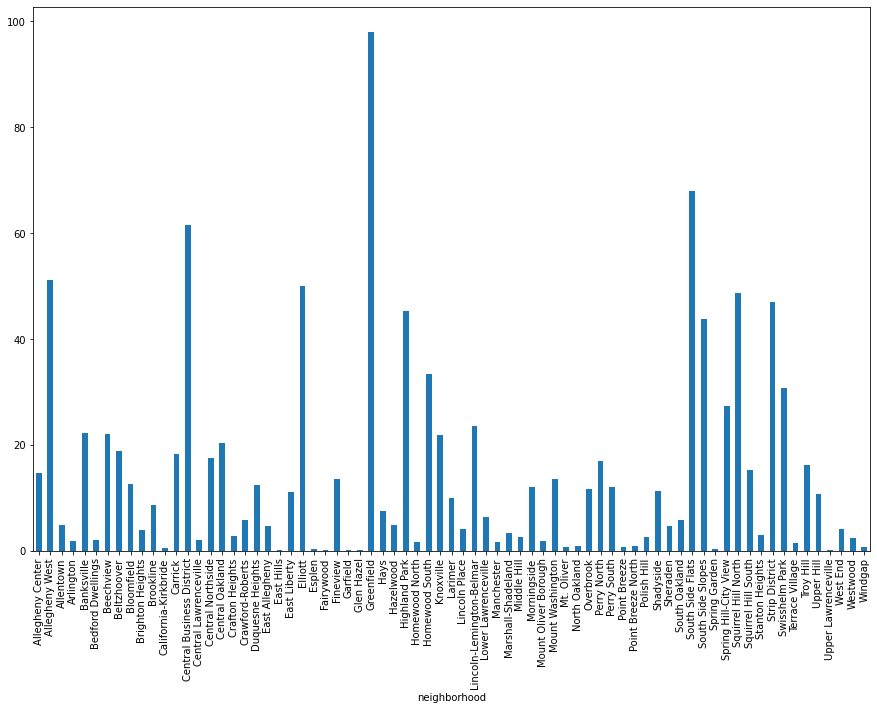

In [7]:
#gives a number 0-100 to each neighborhood
total_sum = capital_data['budgeted_amount'].sum()
final = data.groupby('neighborhood')['budgeted_amount'].sum()/total_sum * 3200
final.plot.bar(figsize=(15,data.shape[0] * 0.01))
print(final)

#### Conclusion

While I expected South Side Flats to rank first I am still surprise that Greenfield won. The dataset didn't mention Greenfield as much, however they were given a large budget for each project so I suppose it's not TOO shocking. Greenfield also had a lot of engineering and facility improvement projects so that might be a reason they ranked first.

## Part 3: Property - Troy

I chose to use property sales for my data to determine the best neighborhood as I figured the more expensive the sales are, the nicer the area would be. Although, I do recognize money is not always everything.

In [9]:
# reads in the datasheet
property_data = pd.read_csv("https://data.wprdc.org/datastore/dump/8eff881d-4d28-4064-83f1-30cc991cfec7")
property_data

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (29,30,31,38,46,57,83,87,92) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,PROPERTYZIP,MUNICODE,MUNIDESC,...,ASOFDATE,MUNICIPALITY,NEIGHBORHOOD,PGH_COUNCIL_DISTRICT,PGH_WARD,PGH_PUBLIC_WORKS_DIVISION,PGH_POLICE_ZONE,PGH_FIRE_ZONE,TRACT,BLOCK_GROUP
0,0001G00224060300,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 603,15222,101,1st Ward - PITTSBURGH,...,2018-09-01,Pittsburgh,Central Business District,6.0,1.0,6.0,2.0,1-4,4.200302e+10,4.200302e+11
1,0001G00224060400,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 604,15222,101,1st Ward - PITTSBURGH,...,2018-09-01,Pittsburgh,Central Business District,6.0,1.0,6.0,2.0,1-4,4.200302e+10,4.200302e+11
2,0001G00224060500,151.0,,FORT PITT BLVD,PITTSBURGH,PA,UNIT 605,15222,101,1st Ward - PITTSBURGH,...,2018-09-01,Pittsburgh,Central Business District,6.0,1.0,6.0,2.0,1-4,4.200302e+10,4.200302e+11
3,0002M00222000000,40.0,,VAN BRAAM ST,PITTSBURGH,PA,,15219,101,1st Ward - PITTSBURGH,...,2018-09-01,Pittsburgh,Bluff,6.0,1.0,3.0,2.0,2-1,4.200301e+10,4.200301e+11
4,0002M00223000000,42.0,,VAN BRAAM ST,PITTSBURGH,PA,,15219,101,1st Ward - PITTSBURGH,...,2018-09-01,Pittsburgh,Bluff,6.0,1.0,3.0,2.0,2-1,4.200301e+10,4.200301e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408795,1356B00176000000,148.0,,CHOWNING CT,GIBSONIA,PA,,15044,938,Richland,...,2018-09-01,Richland Township,NaN,NaN,NaN,NaN,NaN,NaN,4.200341e+10,4.200341e+11
408796,1355A00265000000,0.0,,N PIONEER RD,GIBSONIA,PA,,15044,938,Richland,...,2018-09-01,Richland Township,NaN,NaN,NaN,NaN,NaN,NaN,4.200341e+10,4.200341e+11
408797,1355A00283000000,0.0,,N PIONEER RD,GIBSONIA,PA,,15044,938,Richland,...,2018-09-01,Richland Township,NaN,NaN,NaN,NaN,NaN,NaN,4.200341e+10,4.200341e+11
408798,1355A00297000000,5301.0,,N PIONEER RD,GIBSONIA,PA,,15044,938,Richland,...,2018-09-01,Richland Township,NaN,NaN,NaN,NaN,NaN,NaN,4.200341e+10,4.200341e+11


In [10]:
column_names = ["PROPERTYADDRESS", "NEIGHBORHOOD", "SALEPRICE", "BEDROOMS"]
house_data = pd.DataFrame(property_data, columns=column_names)
houses = house_data[house_data['BEDROOMS'].notna()]
houses = houses[houses['NEIGHBORHOOD'].notna()]
houses
# this block of code makes a cleaner datasheet(uses only needed columns)
# also removes entries with no neighborhood and no bedrooms

,PROPERTYADDRESS,NEIGHBORHOOD,SALEPRICE,BEDROOMS
0,FORT PITT BLVD,Central Business District,699000.0,2.0
1,FORT PITT BLVD,Central Business District,350000.0,2.0
2,FORT PITT BLVD,Central Business District,265000.0,1.0
3,VAN BRAAM ST,Bluff,25550.0,4.0
4,VAN BRAAM ST,Bluff,45550.0,6.0
...,...,...,...,...
407109,CARRIE ST,Spring Garden,0.0,2.0
407110,CARRIE ST,Spring Garden,6000.0,2.0
407211,LUTY AVE,Spring Garden,25000.0,3.0
407644,CLIFF ST,Crawford-Roberts,20500.0,3.0


In [11]:
avg_n = dict(houses.groupby('NEIGHBORHOOD')['SALEPRICE'].mean())
avg_info = {'Average': avg_n}
avgF = pd.DataFrame(avg_info)
avgF = avgF.sort_values(by=['Average'], ascending=False)
avgF
# found the average of the sales for each 

,Average
Strip District,322433.133333
California-Kirkbride,302699.206573
Squirrel Hill North,285505.609037
Central Business District,267033.201354
Shadyside,230446.649372
...,...
Homewood West,11052.138756
Beltzhoover,10146.409929
Bedford Dwellings,8009.813333
Chateau,5.500000


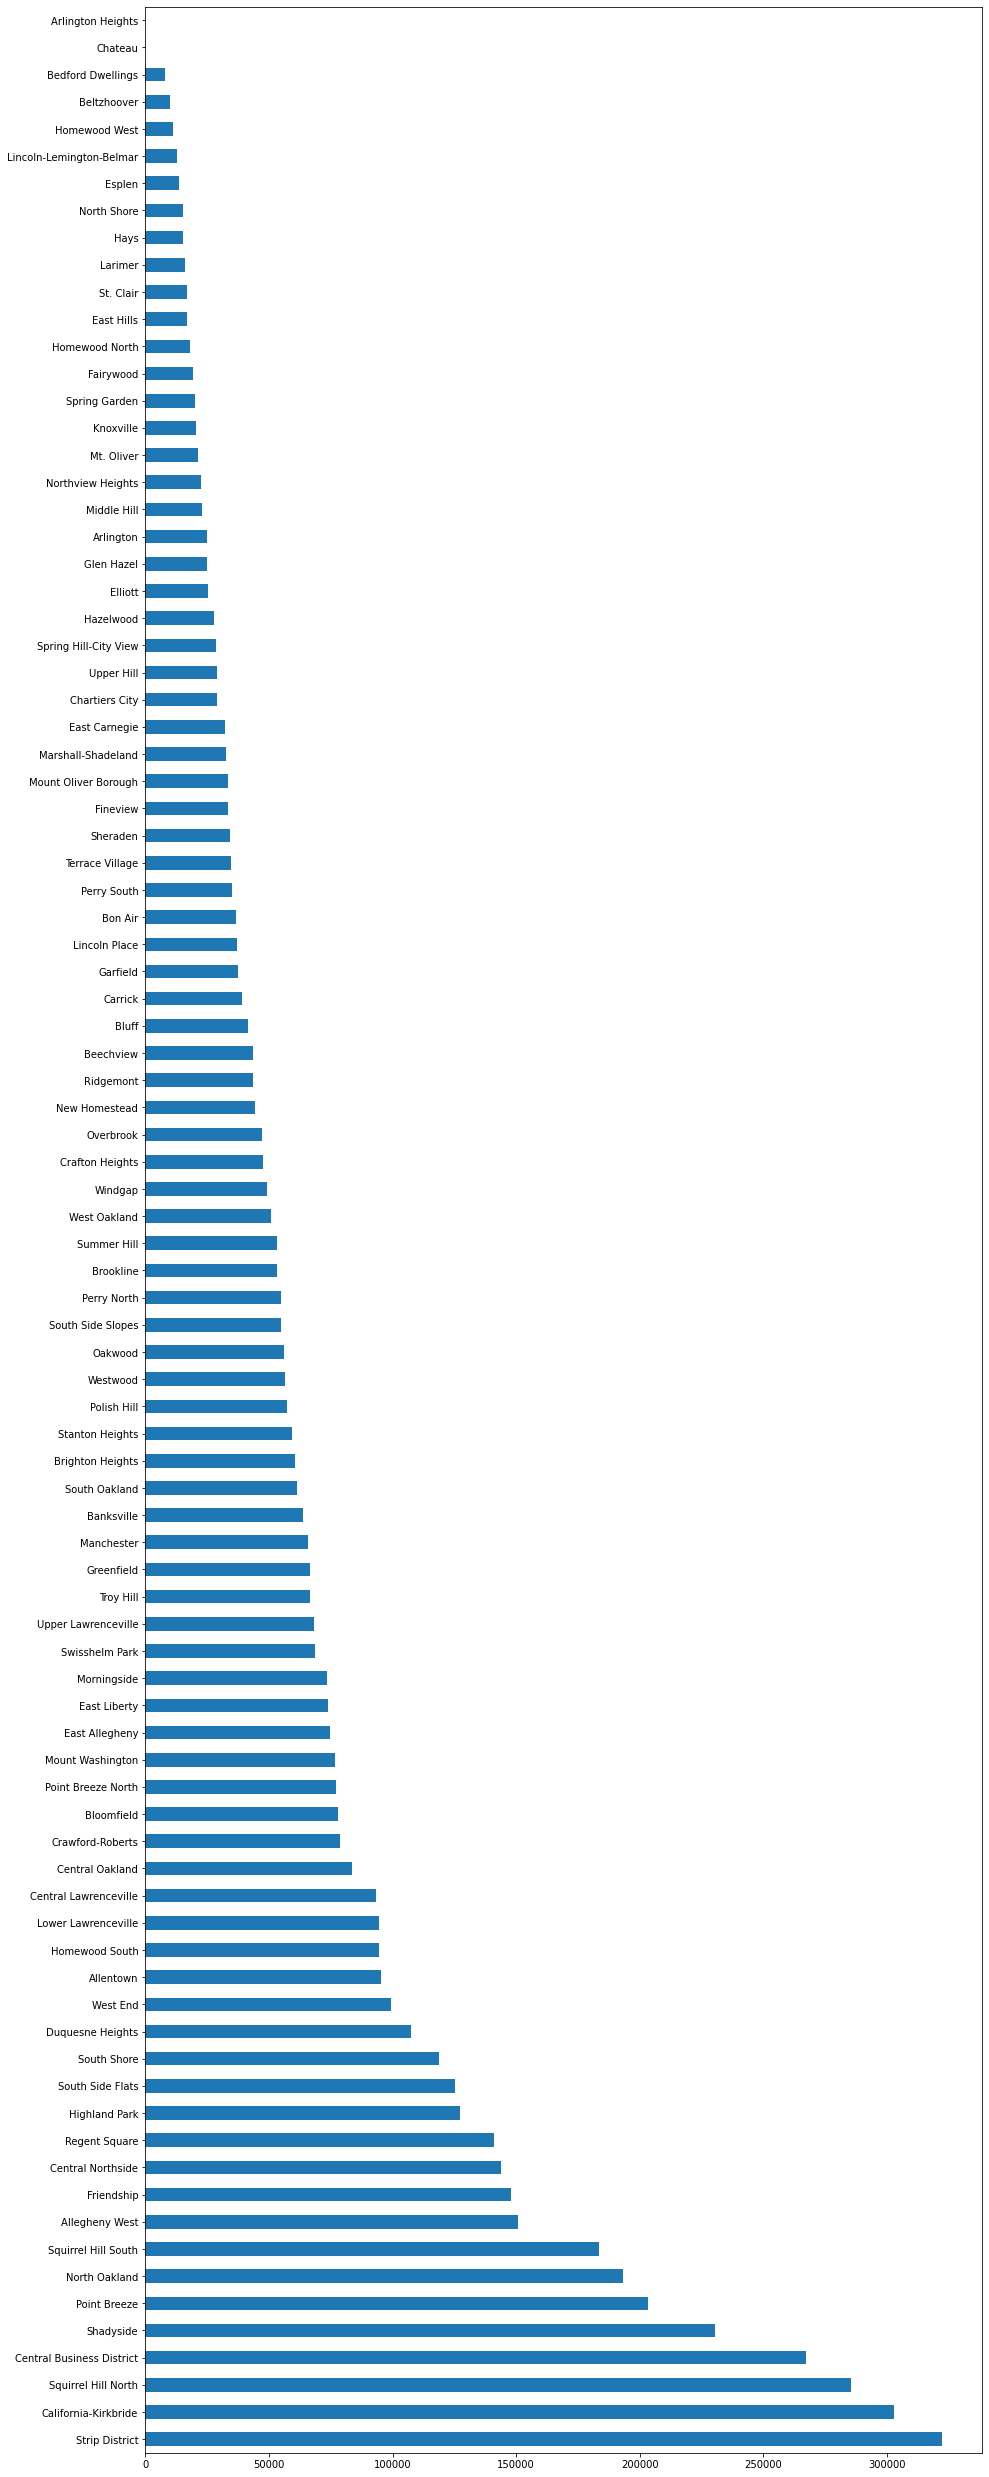

In [12]:
graph = avgF.plot.barh(figsize=(15,avgF.shape[0] * .5), legend=None) #plots the bar graph below

In [13]:
avgF['Score'] = (avgF['Average']/10000)*3
avgF
#computes a score between 0 and 100 based on an arbitrary formula

,Average,Score
Strip District,322433.133333,96.729940
California-Kirkbride,302699.206573,90.809762
Squirrel Hill North,285505.609037,85.651683
Central Business District,267033.201354,80.109960
Shadyside,230446.649372,69.133995
...,...,...
Homewood West,11052.138756,3.315642
Beltzhoover,10146.409929,3.043923
Bedford Dwellings,8009.813333,2.402944
Chateau,5.500000,0.001650


#### Conclusion

Based on the data for house sales, the Strip District is the best neighborhood due to it having the highest average value in their property sales. It is slightly different than what I expected as I expected Squirrel Hill and Shadyside to top the list, but they ended third and fifth

## Conclusion

In order to find which we combined the scores together to get an overall top 5

In [14]:
combined = pd.read_csv("Combined_Scores.csv")

In [15]:
combined

,Neighborhood,Property Score,Capital Projects Score,Art Score,Overall Score(AVG)
0,Central Business District,80.11,61.59,27,56.23
1,Strip District,96.73,46.96,2,48.56
2,Squirrel Hill North,85.65,48.71,2,45.45
3,Greenfield,19.95,97.91,3,40.29
4,South Side Flats,37.64,67.88,10,38.51
...,...,...,...,...,...
67,Homewood North,5.43,1.57,0,2.33
68,East Hills,5.08,0.04,1,2.04
69,Fairywood,5.79,0.04,0,1.94
70,Esplen,4.13,0.31,1,1.81


In [16]:
neighborhoods = combined["Neighborhood"].values
propertyScore = combined["Property Score"].values
capitalScore = combined["Capital Projects Score"].values
artScore = combined["Art Score"].values
avgScore = combined["Overall Score(AVG)"].values

In [17]:
import matplotlib.pyplot as plt

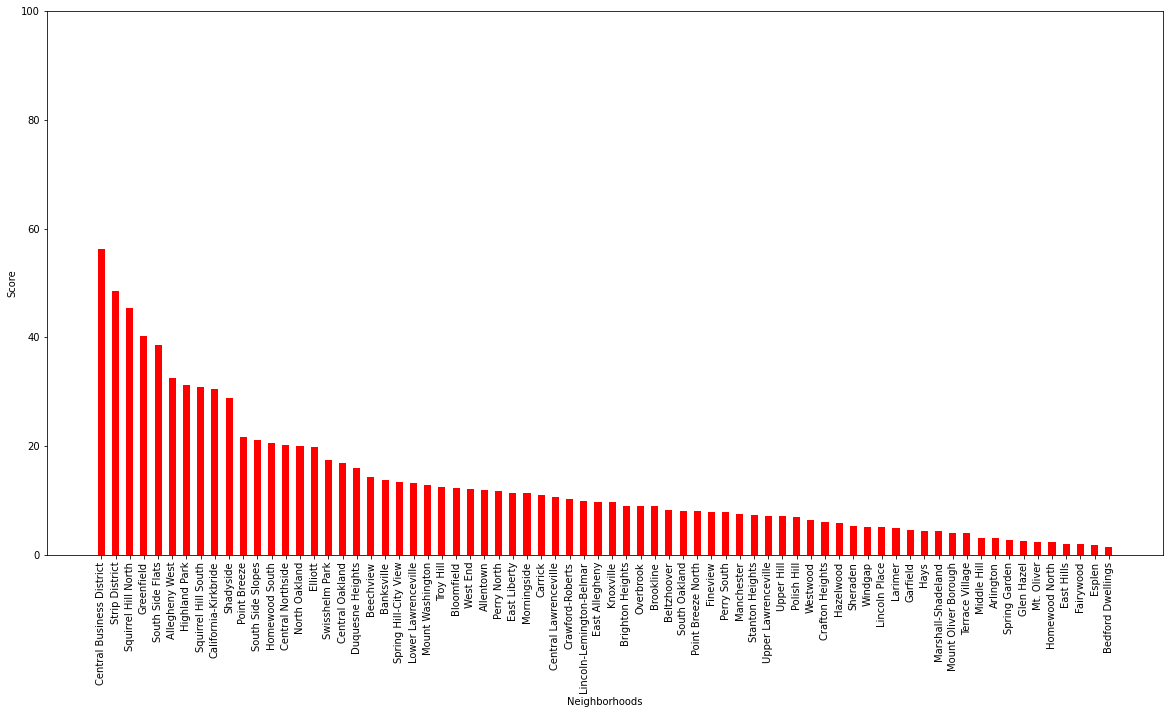

In [20]:
plt.figure(figsize=(20,10))
plt.ylim(0,100)
plt.bar(neighborhoods, avgScore, width= 0.5, label = 'Overall Score(AVG)', color = 'red')
# plt.bar(neighborhoods, propertyScore, width= 0.5, label = 'Property Score', color = 'red', bottom = capitalScore)
# plt.bar(neighborhoods, capitalScore, width= .5, label = 'Capital Score', color = 'blue', bottom = artScore)
# plt.bar(neighborhoods, artScore, width= .5, label = 'Art Score', color = 'green')
plt.xticks(neighborhoods,rotation=90)
plt.ylabel("Score")

plt.xlabel("Neighborhoods")
plt.show()

## OVERALL TOP 5

1. Central Business District
2. Strip District
3. Squirrel Hill North
4. Greenfield
5. South Side Flats